In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils import GamblerProblemModel, VIApproach

In [2]:
p = GamblerProblemModel(goal=100, success_probability=0.4)
p.n_states, p.n_nonterminal_states, p.n_actions

(101, 99, 50)

In [3]:
v_track, pi_track, err_track = p.run_value_iteration(convergence=10e-8, keep_track=True)
v_track.shape

(17, 99)

In [4]:
print(pi_track[-1])
print(v_track[-1])


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 10  9  8  7  6  5  4  3  2  1  0
 24  0  1  2  3  4  5  6  7  8  9 10 11 11 10  9  8  7  6  5  4  3  2  1
  0 49  0  1 46 45  4  5 42  7 40  9 38 37 11 10  9  8  7  6  5  4  3 27
  1  0 24  0  1  2  3  4 18  6 16  8  9 13 12 11 10  9  8  7  6  5  4  3
  2  1  0]
[0.0021 0.0052 0.0093 0.013  0.0175 0.0232 0.0279 0.0324 0.0378 0.0436
 0.0505 0.0578 0.0654 0.0697 0.0746 0.0808 0.0868 0.0944 0.1033 0.1088
 0.1162 0.1261 0.1338 0.1444 0.1601 0.1633 0.1679 0.174  0.1795 0.1862
 0.1948 0.2019 0.2086 0.2167 0.2253 0.2357 0.2467 0.258  0.2645 0.2718
 0.2812 0.2901 0.3015 0.3149 0.3231 0.3341 0.349  0.3605 0.3764 0.4
 0.4032 0.4078 0.414  0.4195 0.4262 0.4347 0.4419 0.4485 0.4567 0.4653
 0.4757 0.4867 0.498  0.5044 0.5118 0.5212 0.5301 0.5415 0.5548 0.5631
 0.5741 0.589  0.6005 0.6164 0.64   0.6447 0.6517 0.6609 0.6692 0.6792
 0.6921 0.7027 0.7128 0.7249 0.7379 0.7535 0.7699 0.7869 0.7966 0.8076
 0.8217 0.835  0.8521 0.8722 0.8846 0.901  0.9234 0.9406 0.96

In [5]:
print(err_track)

[4.00e-01 2.40e-01 1.44e-01 8.64e-02 5.19e-02 3.11e-02 1.25e-02 7.50e-03
 3.00e-03 1.80e-03 1.10e-03 6.00e-04 3.00e-04 2.00e-04 1.00e-04 1.00e-04
 0.00e+00]


In [6]:
def plot_value_iteration(vs, pis):
    x = np.arange(pis.shape[1]) + 1
    kw = dict(ls='--', marker='.', lw=1)

    fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    for ax in axes:
        ax.grid(color='lightgrey')
        ax.set_xlabel("State (capital)")

    for idx in (0, 1, 2, -1):
        axes[0].plot(
            x,
            vs[idx],
            label=(f"{len(vs)} (final)" if idx==-1 else f"{idx+1}"),
            **kw
        )

    axes[0].legend(title="Iteration", fancybox=True, framealpha=0.5)
    axes[0].set_title("Value function - iteration results")
    axes[0].set_ylabel("State value")

    axes[1].plot(x, pis[-1], **kw)
    axes[1].set_title("Optimal policy")
    axes[1].set_ylabel("Policy (bet value)")

    fig.subplots_adjust(hspace=0.3)


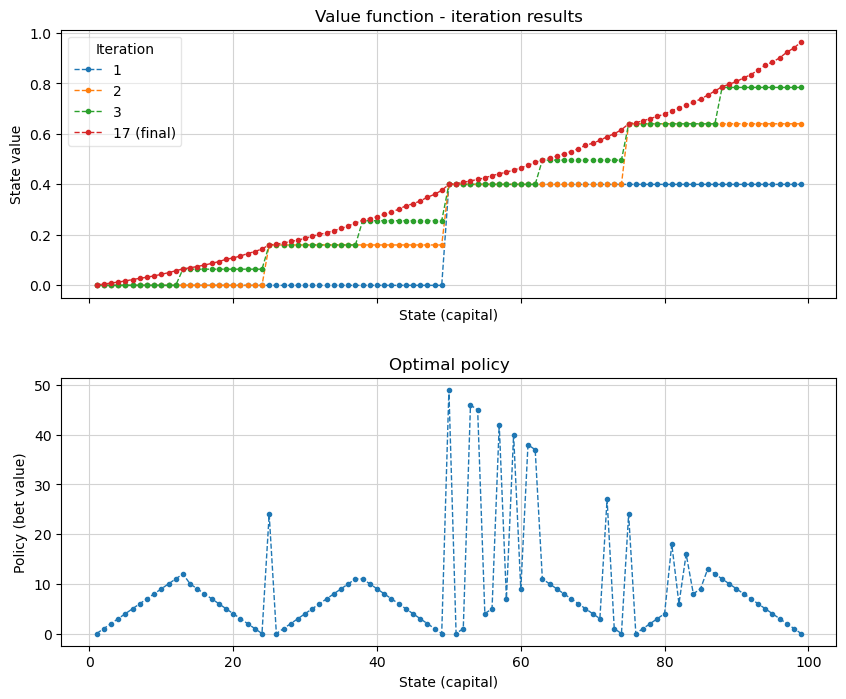

In [7]:
plot_value_iteration(v_track, pi_track)

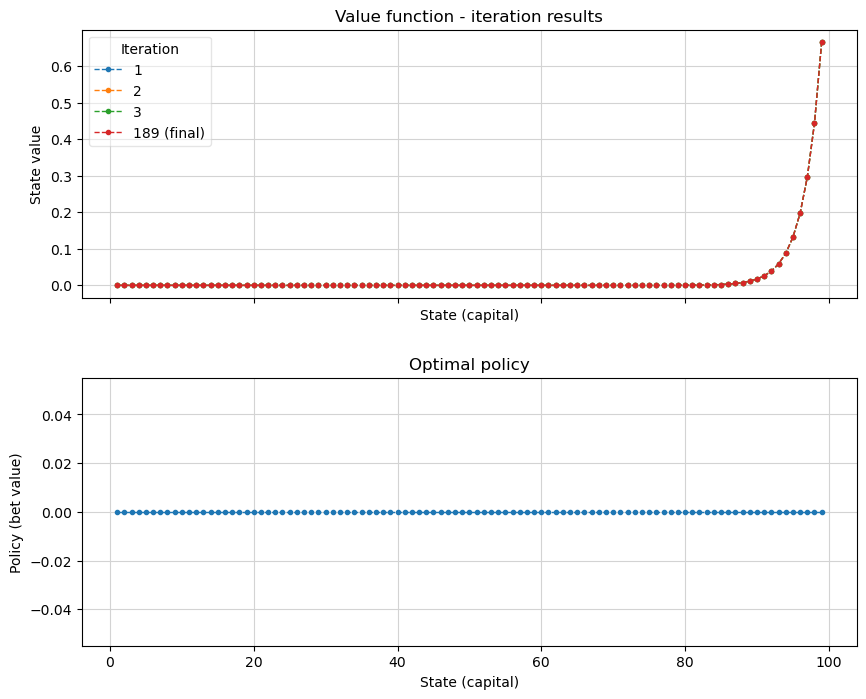

In [8]:
ip_v_track, ip_pi_track, ip_err_track = p.run_value_iteration(
    convergence=10e-8, keep_track=True, approach=VIApproach.IN_PLACE)
plot_value_iteration(ip_v_track, ip_pi_track)
